<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [2]:
!pip install yfinance
#!pip install pandas

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d9a1ea9dacf3357a41f0c9bf2b82f218b91f1b472713be05e04a44f368e6776c
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [4]:
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [5]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.29013848,
 'SandP52WeekChange': 0.31455648,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 146.97,
 'askSize': 2200,
 'averageDailyVolume10Day': 75906475,
 'averageVolume': 81387312,
 'averageVolume10days': 75906475,
 'beta': 1.202797,
 'beta3Year': None,
 'bid': 146.96,
 'bidSize': 1100,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 147.06,
 'currentRatio': 1.062,
 'dateShortInterest': 1626307200,
 'dayHigh': 147.84,
 'dayLow': 146.17,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.006,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 22.562,
 'enterpriseToRevenue': 7.21,
 'enterpriseValue': 2502902939648,
 'exDividendDate': 1628208000,
 'exchange':

We can get the <code>'country'</code> using the key country


In [6]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [10]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [11]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1,1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
2,1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
3,1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
4,1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10244,2021-07-30,144.380005,146.330002,144.110001,145.860001,70382000,0.0,0.0
10245,2021-08-02,146.360001,146.949997,145.250000,145.520004,62880000,0.0,0.0
10246,2021-08-03,145.809998,148.039993,145.179993,147.360001,64660800,0.0,0.0
10247,2021-08-04,147.270004,147.789993,146.279999,146.949997,56319800,0.0,0.0


We can plot the `Open` price against the `Date`:


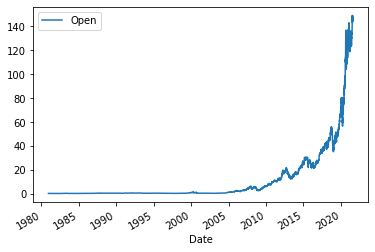

In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [ ]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
Name: Dividends, Length: 71, dtype: float64

We can plot the dividends overtime:


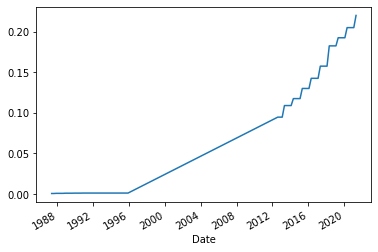

In [ ]:
apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [ ]:
AMD = yf.Ticker("AMD")

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [ ]:
AMD_info = AMD.info
AMD_info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [ ]:
AMD_info['sector']

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [ ]:
AMD_price= AMD.history(period="max")
AMD_price['Volume'][0]
AMD_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-07-30,101.599998,106.970001,101.379997,106.190002,125567000,0,0.0
2021-08-02,105.930000,110.330002,103.830002,108.629997,115581900,0,0.0
2021-08-03,108.150002,114.849998,107.660004,112.559998,157496100,0,0.0


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
